#Mescla de datasets

In [ ]:
!pip install sweetviz

In [ ]:
import pandas as pd
import re
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set(rc={'figure.figsize':(20,9)})

In [ ]:
amazon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon_prime_titles.csv')
netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv')

In [ ]:
amazon.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
netflix.head(5)
#Possivel ideia: Classificar o genero

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
amazon.isna().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Conferindo valores nulos nos datasets. 
# Podemos usar o titulo para juntar as tabelas. 
# Algumas analises podem ser prejudicadas pelo excesso de valores nulos, como o pais de origem de filmes da amazon
# Não iremos precisar da coluna show_id

In [ ]:
amazon.drop("show_id", axis=1, inplace=True)
netflix.drop("show_id", axis=1, inplace=True)

In [ ]:
# Contatena os datasets e retira os registros com o mesmo titulo.
concatdf = pd.concat([amazon,netflix]).drop_duplicates(subset=['title']).reset_index(drop=True)
concatdf.shape

(18086, 11)

# Análise Exploratória:

In [ ]:
# Release_year e Rating são corelativos em ambos os datasets, talvez demonstrando a mudança cultural ao longo dos anos ou talvez uma tendencia em se produzir mais conteudo voltado para uma faixa etaria
# Ambos os serviços tem mais filmes, mas o catalogo da netflix é ligeiramente mais balanceado
# Netflix conta com uma diversidade de países muito maior
# Amazon tem um catalogo de conteudo indiano muito maior
# Em questão de ratings as aparencias podem enganar, enquanto a Amazon parece monopolizar o espaço '18+' a netflix conta com quase todos em 'TV-MA' que na pratica é '17+'

                                             |          | [  0%]   00:00 -> (? left)


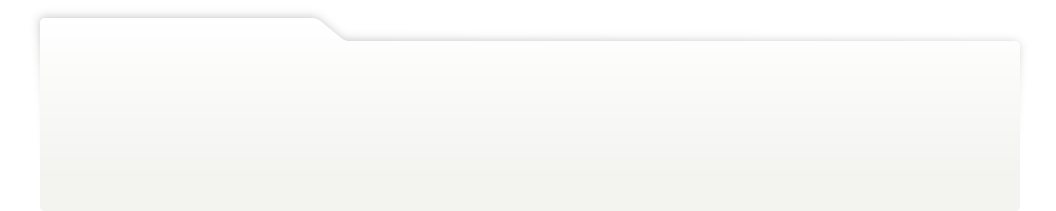
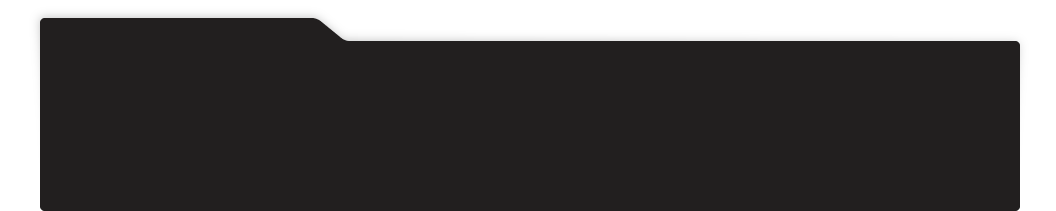
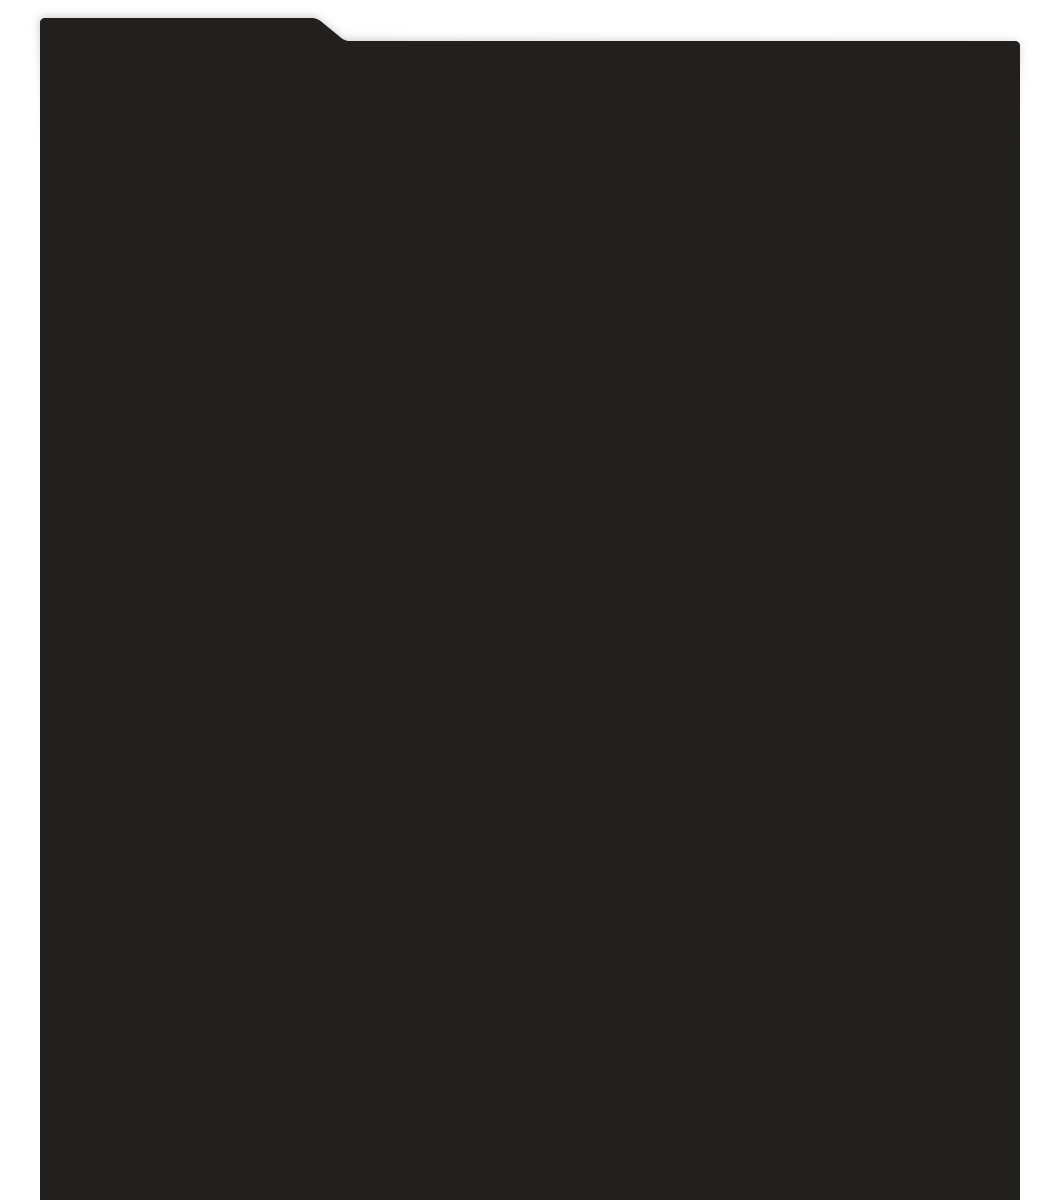
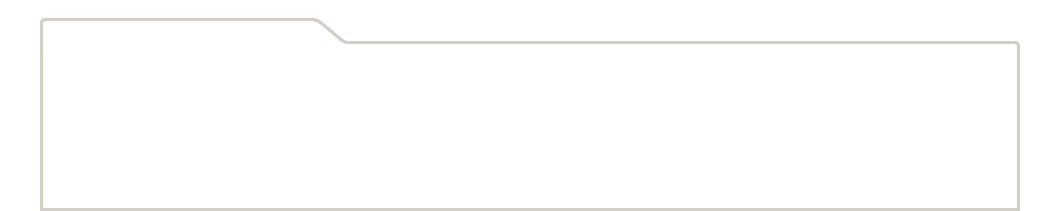
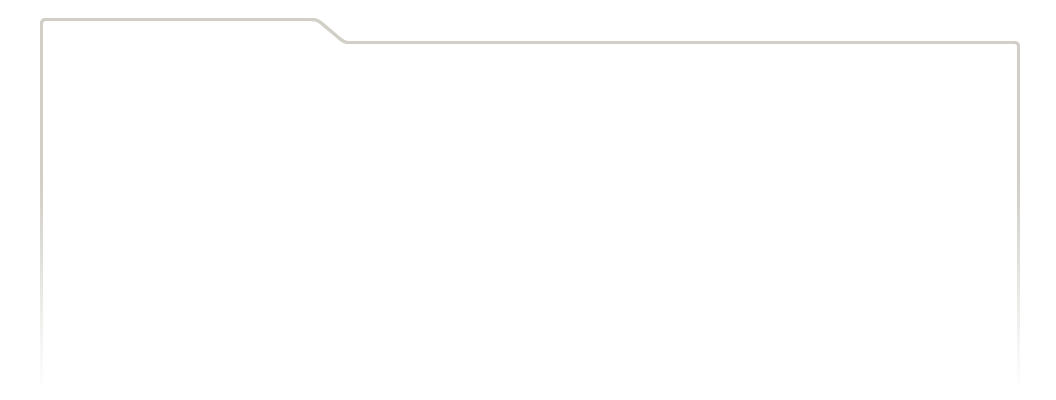
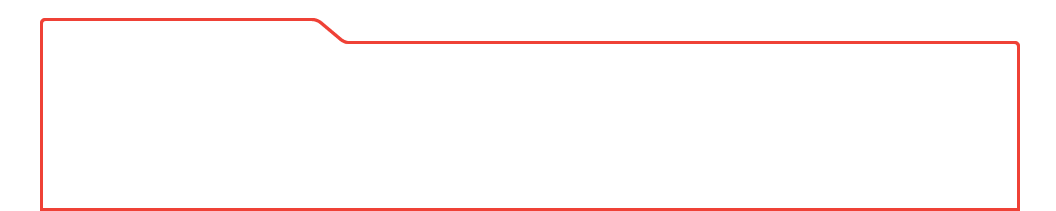
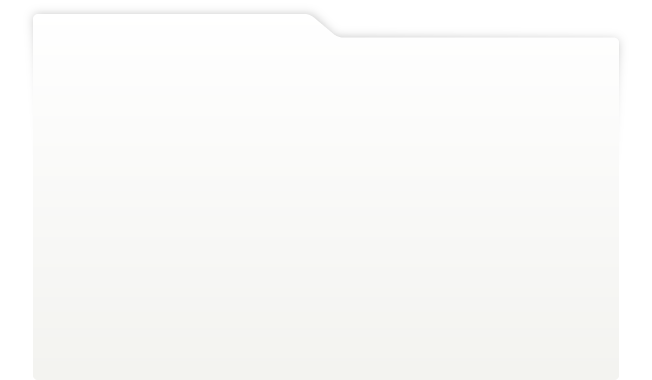
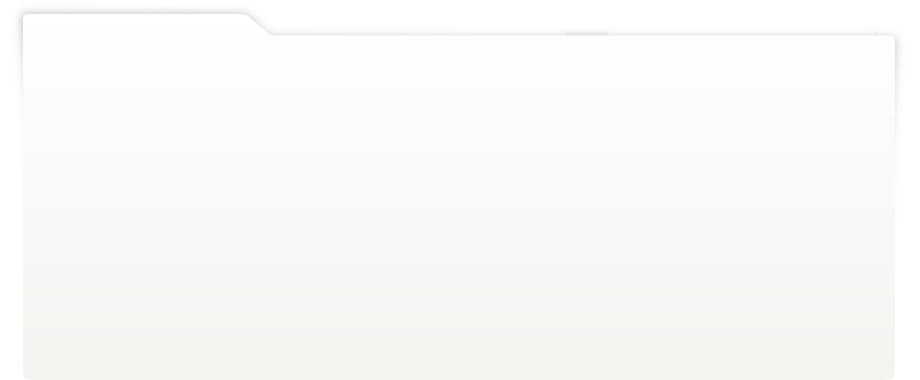
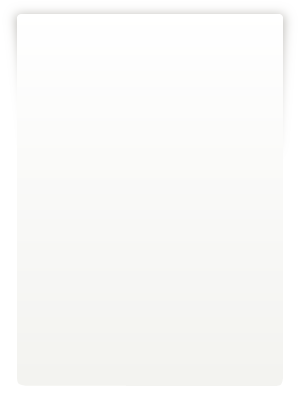
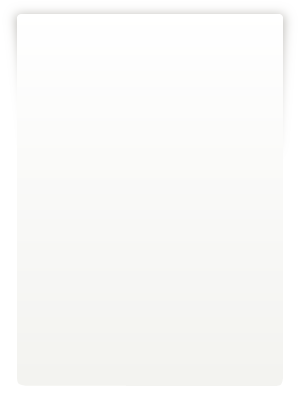
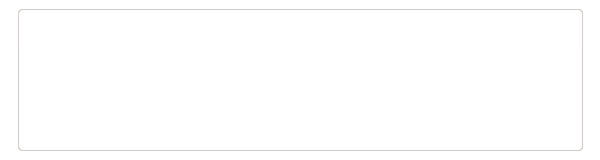
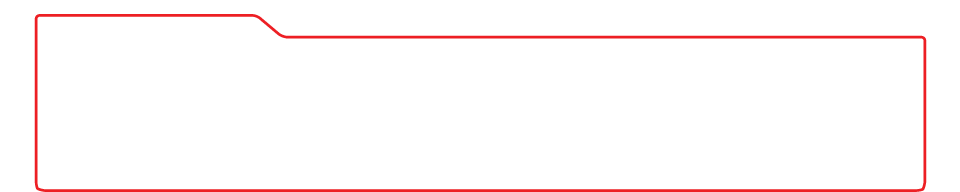
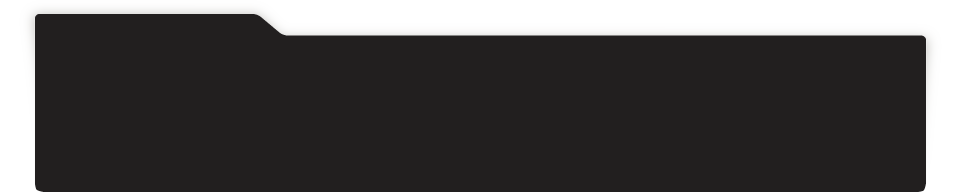
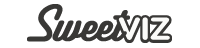
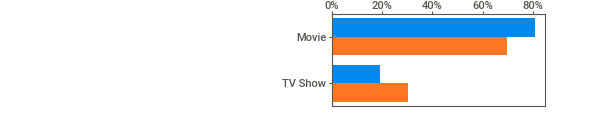
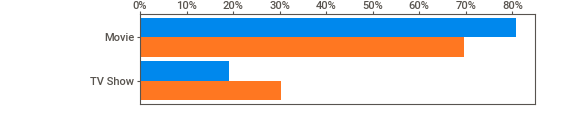
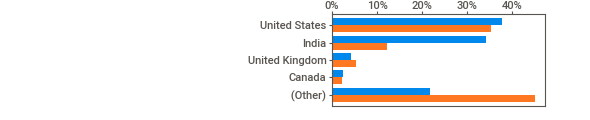
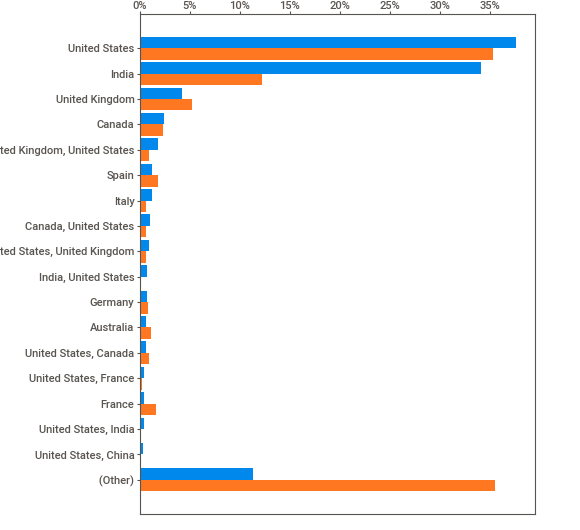
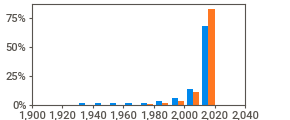
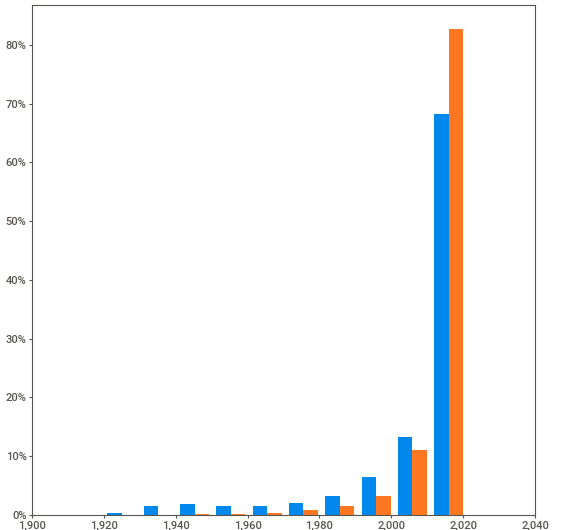
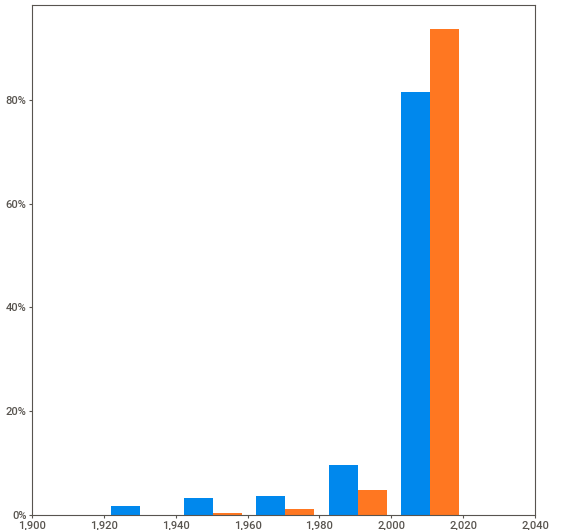
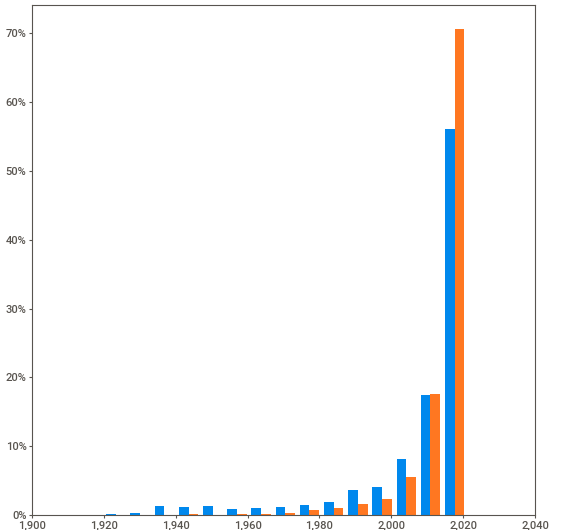
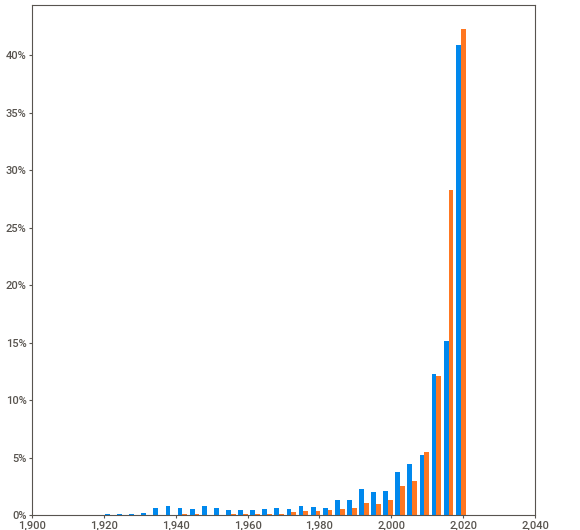
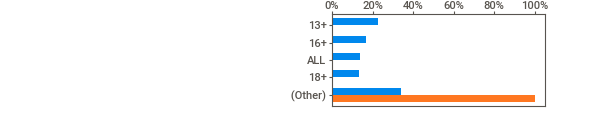
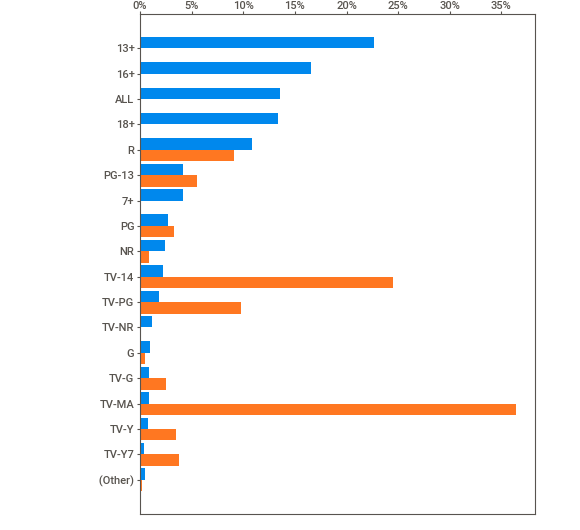
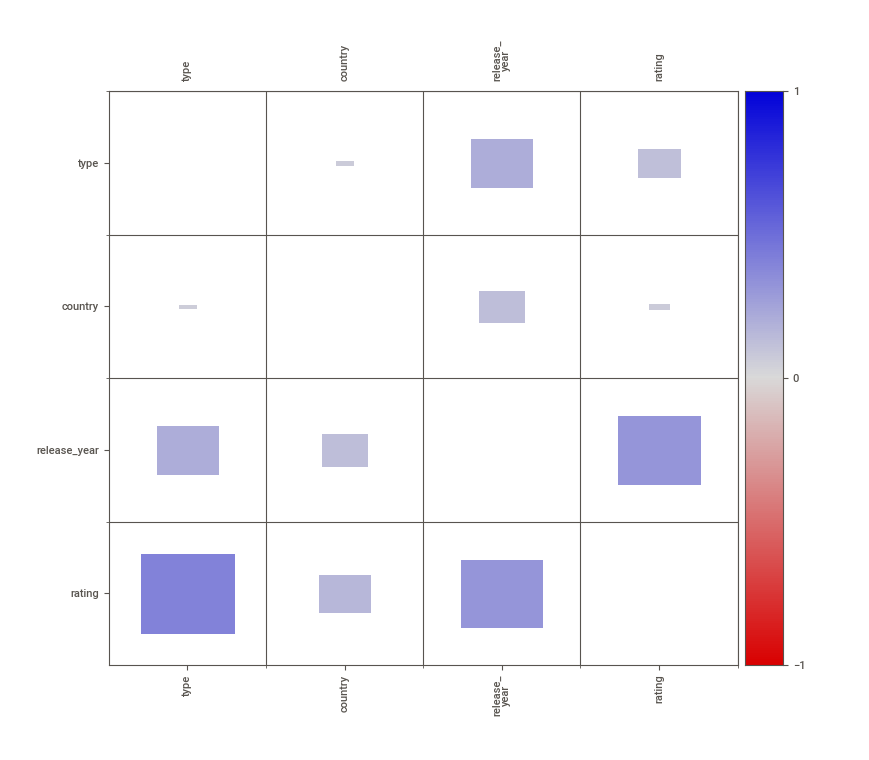
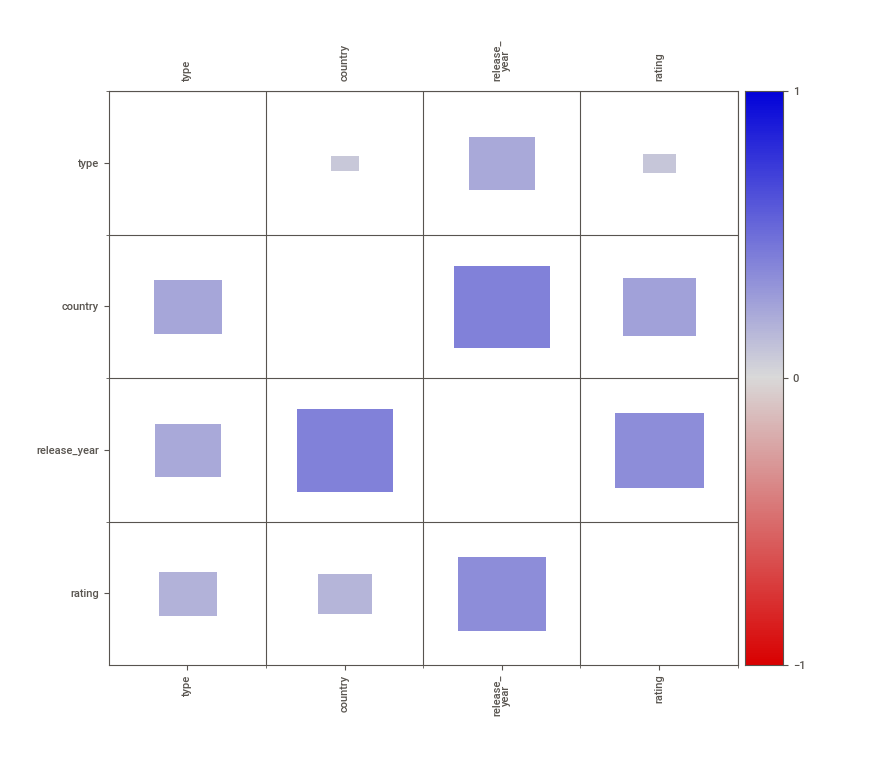

In [ ]:
dualReport = sv.compare([amazon, 'Amazon'], [netflix, 'Netflix'])
dualReport.show_notebook()

In [ ]:
myReport = sv.analyze(concatdf)
myReport.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



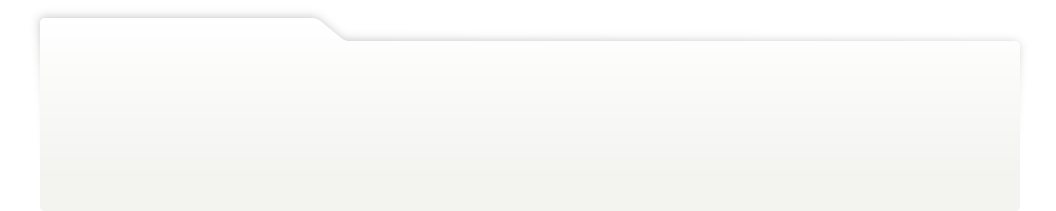
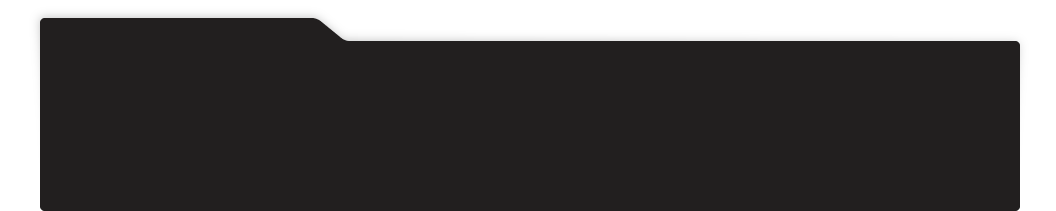
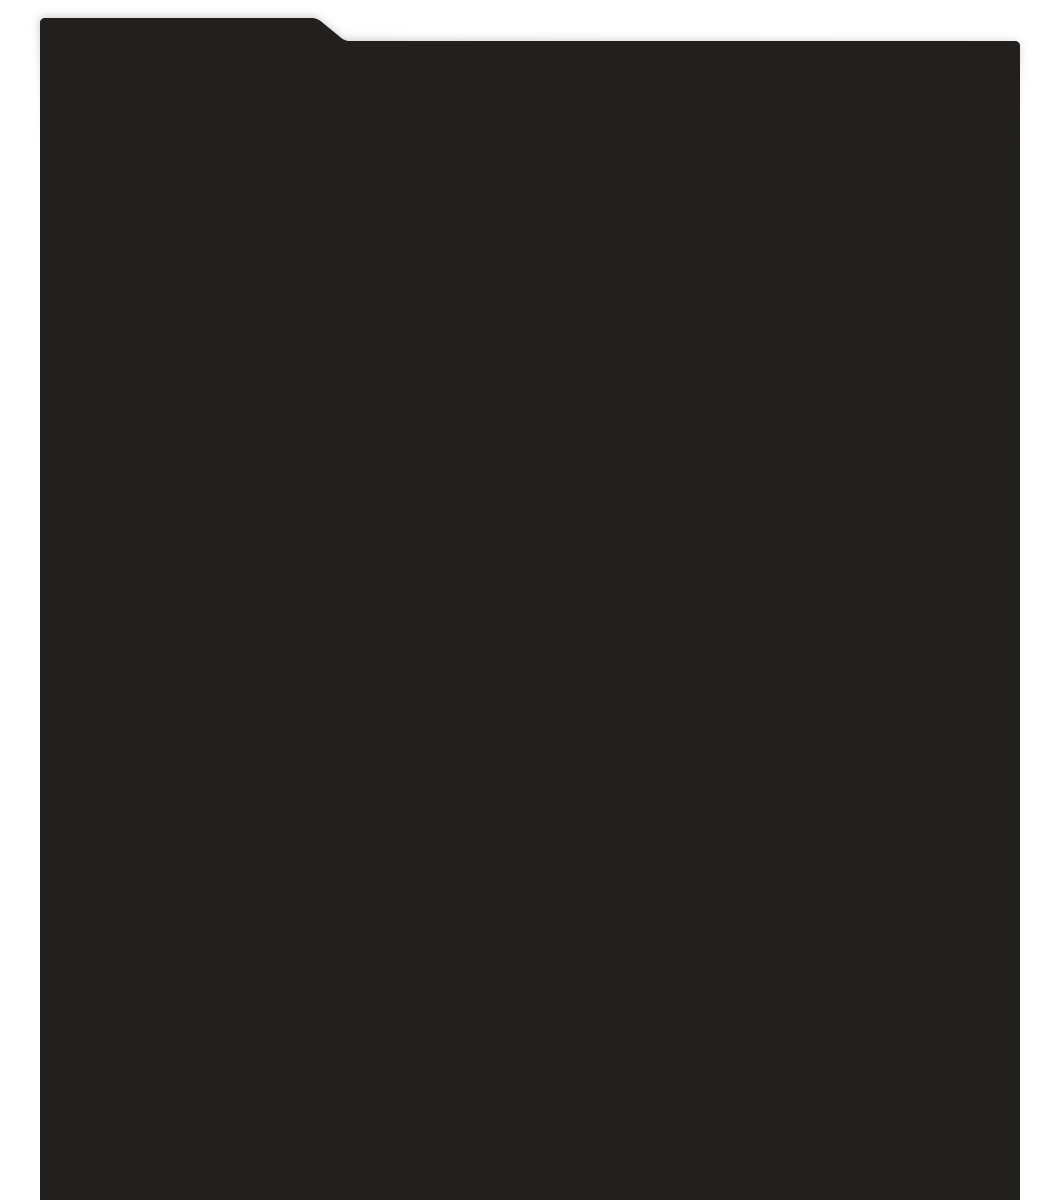
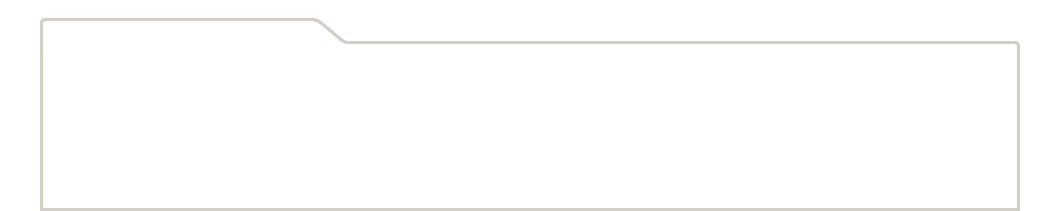
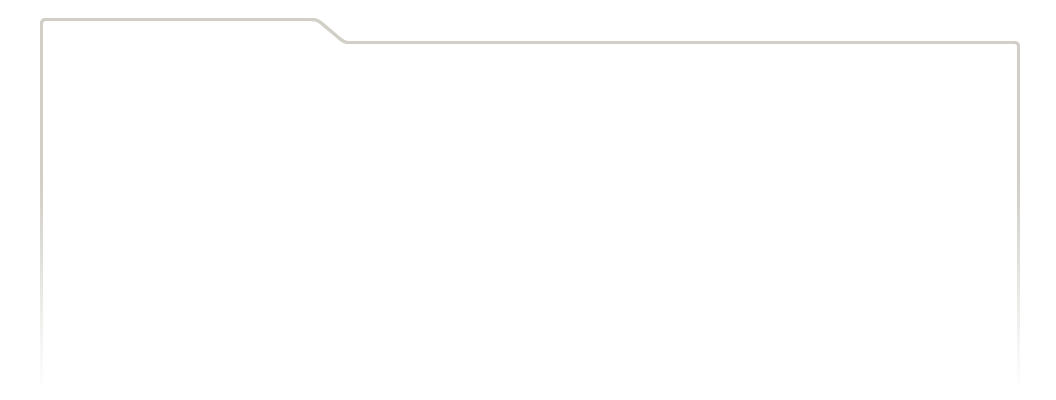
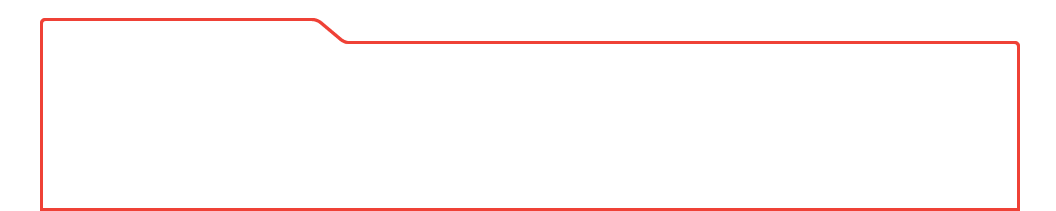
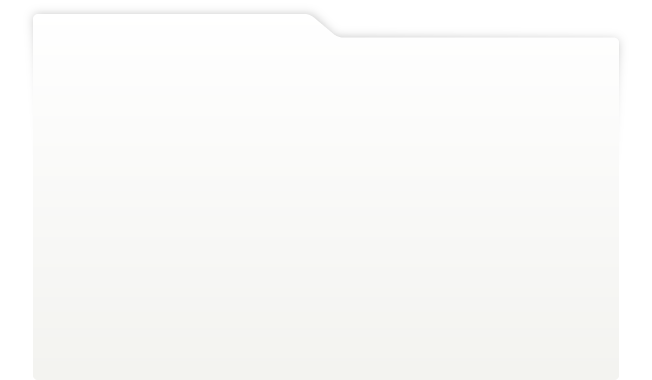
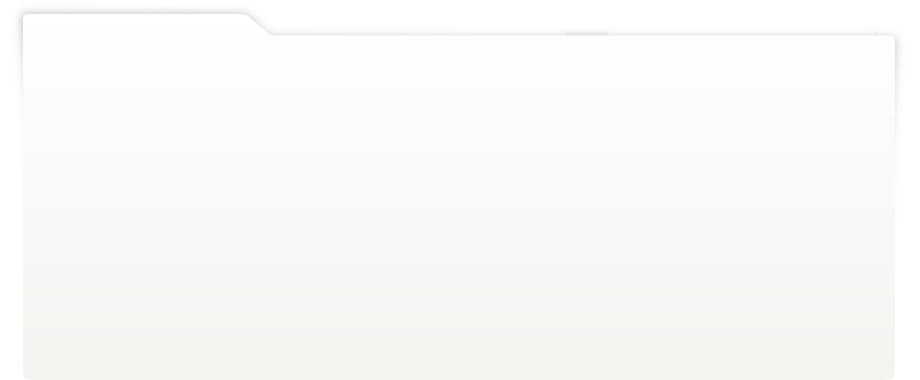
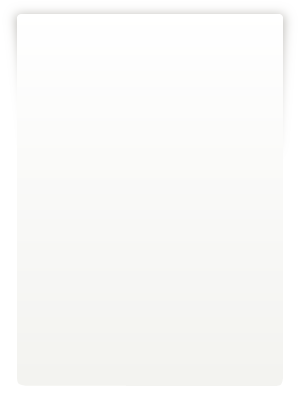
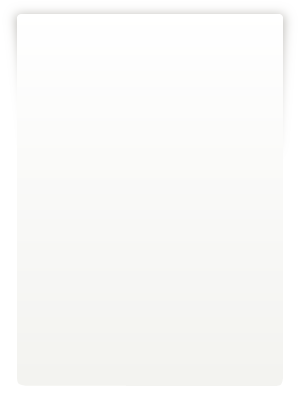
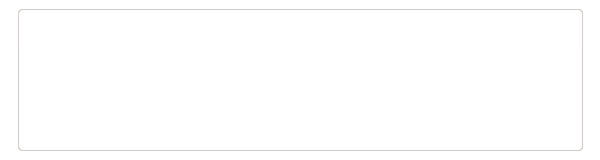
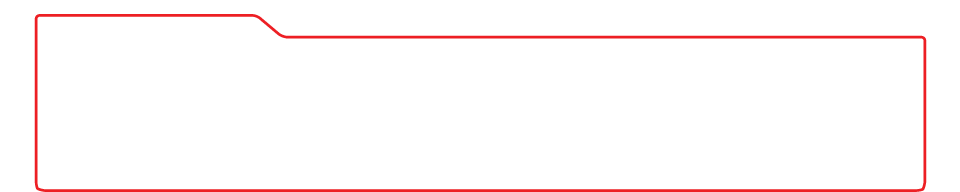
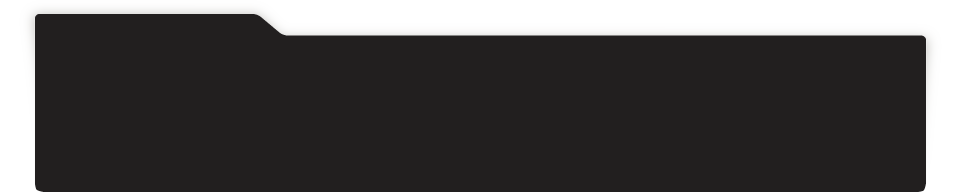
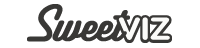
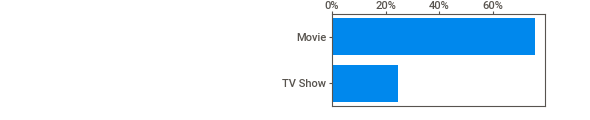
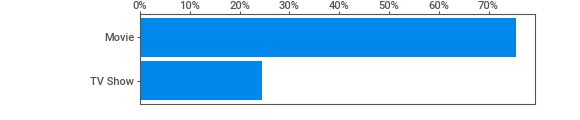
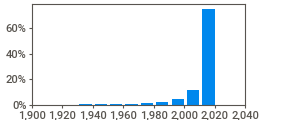
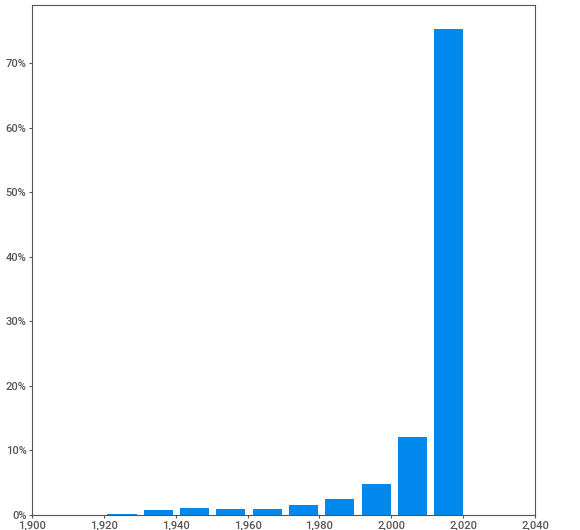
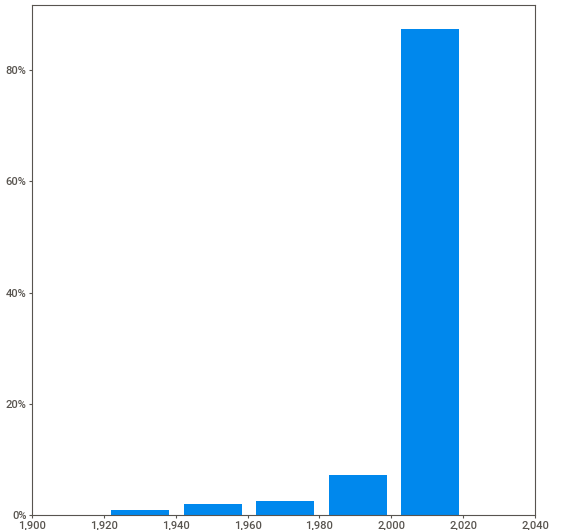
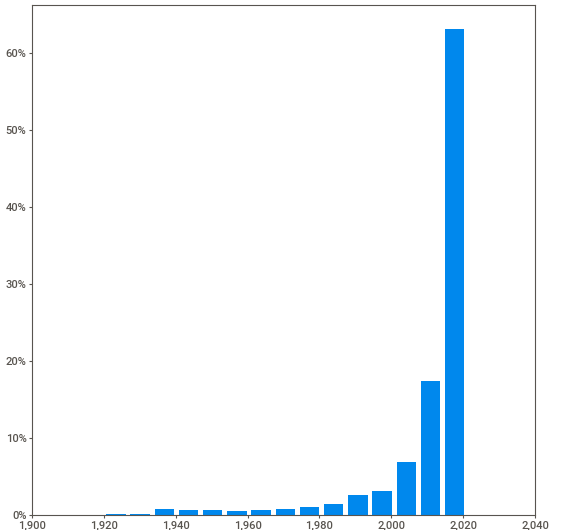
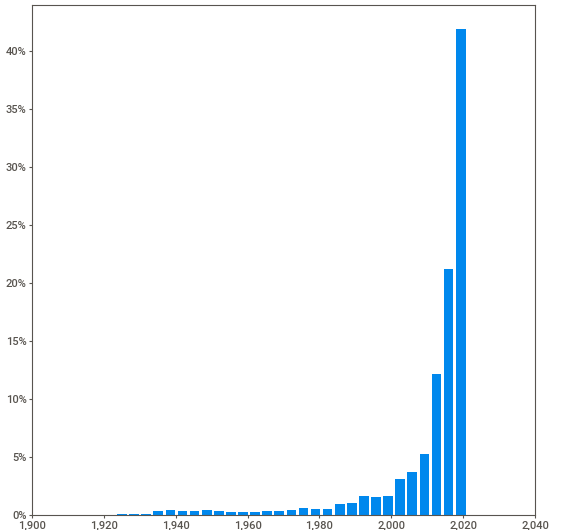
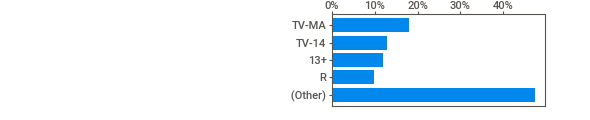
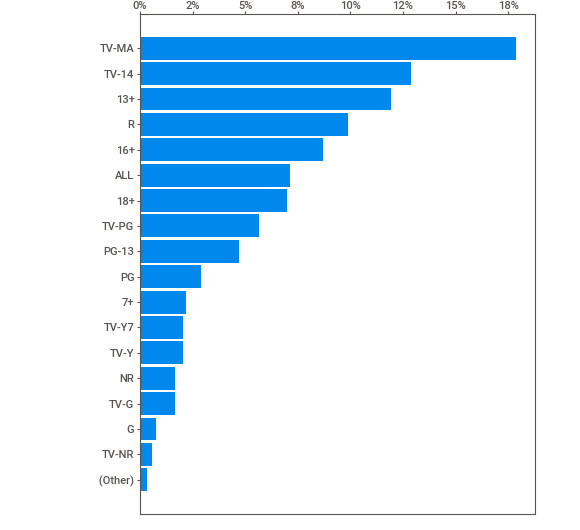
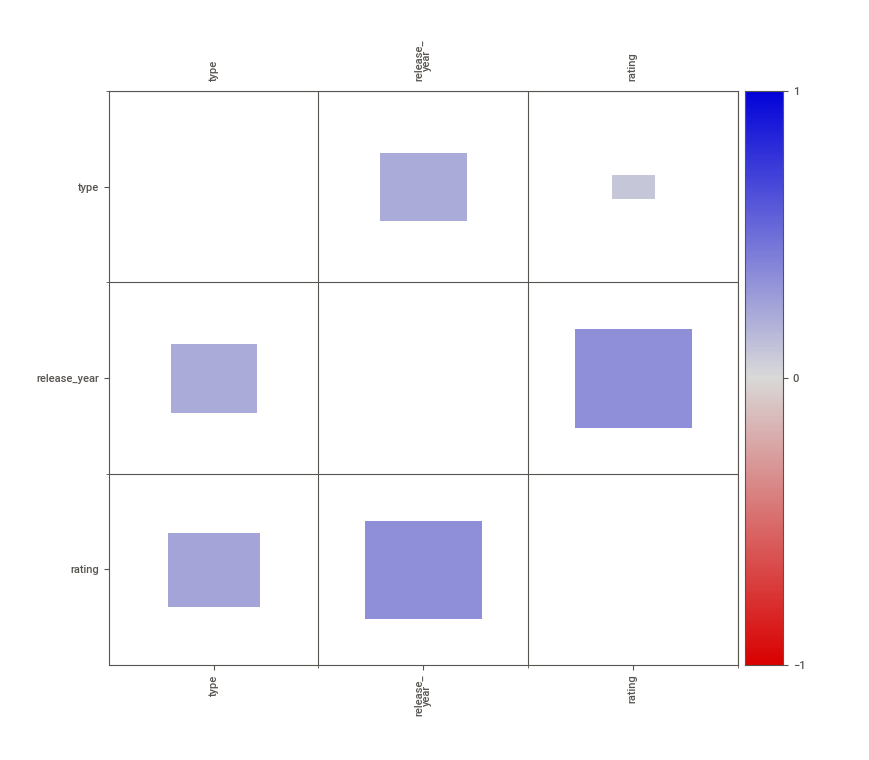
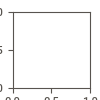

In [ ]:
myReport.show_notebook()
# Achei interessante que o dia com maior numero de novos conteudos é o primeiro de Janeiro. Os serviços parecem preferir por adicionar novos conteudos sempre no primeiro dia de cada mês. 
# Podemos ver que a mediana para o ano de lançamento dos conteudos é em 2017
# Bastante nomes parecidos nos generos - 'Comedy' e 'Comedies'
# Existem valores repetidos nas discrições

In [ ]:
for i in range(0,len(concatdf)):
  if 'from Formula 1, Fernando Alonso returns to the team with which he won two world championship' in concatdf['description'][i]:
    print(concatdf['title'][i])

Fernando 4K UHD (Dubbed)
Fernando 4K UHD
Fernando (Dubbed)
Fernando


In [ ]:
for i in range(0,len(concatdf)):
  if 'A guided meditation to help you overcome anxiety in your life. Guided by Donna D\' Cruz.' in concatdf['description'][i]:
    print(concatdf['title'][i])
    print(concatdf['cast'][i])

One-Minute Anxiety Meditation
Donna D' Cruz
5-Minute Anxiety Meditation
Donna D' Cruz
30-Minute Anxiety Meditation
Donna D' Cruz
15-Minute Anxiety Meditation
Donna D' Cruz


In [ ]:
# Complicado, existem filmes repetidos mas com titulos diferentes e filmes distintos mas com descrições identicas. 

#Data Cleaning

In [ ]:
# Meus objetivo neste momento é eliminar registros duplicados ou inutilizaveis 

In [ ]:
for i in range(0,len(concatdf)):
  if concatdf['description'][i] == '1' or concatdf['description'][i] == '2' or concatdf['director'][i] == '1' or concatdf['cast'][i] == '1':
    print(concatdf['title'][i])

Series before 1C onboarding - 2
Series before 1C onboarding - 1
Title Post onboarding 8
Act 4 - Title before 1C onboarding 2
Act 4 - Title before 1C onboarding 1
Clip: 1
Series before 1C onboarding - 7
Clip: ACT 4 - Title after removing 1C - 5
Clip: ACT 4 - Title after removing 1C - 2
ACT 4 - Title after removing 1C - 1
Clip: ACT 4 - Title after removing 1C - 4
Clip: ACT 3 Series post 1C 2
Act 6 - Title 1
Act 5 - Title 1
Clip: ACT 2 - Series 5
Act 6 - Series 2
Act 6 - Series 1
Act 5 - Series 2
Act 5 - Series 1
ACT 2 - Series 6
ACT 2 - Series 9
ACT 2 - Series 7
ACT 2 - TITLE 9
ACT 2 - TITLE 8
ACT 2 - TITLE 7
ACT 2 - TITLE 6
ACT 2 - Series 8
Act 2 - Series 4
Act 2 - Series 3
Act 2 - Series 2
ACT 2 - Series 10
Act 2 - Series 1
Clip: Act 5 - Title 5
Clip: Act 5 - Title 3


In [ ]:
for i in range(0,len(concatdf)):
  if concatdf['cast'][i] == 'Test Actor 1, Test Actor 2':
    print(concatdf['title'][i])

Series_Project_UN_Test_UHD
Movie_Project_UN_Test_UHD
Asin_tombstone_test_target
Asin_tombstone_test_target_04
Asintombstonetest-target
SslmRegUsTV02SourceSERIES
SslmRegUsTV002TargetSERIES
ProjectUNUnApprovedMovieTarget


In [ ]:
# Podemos tirar esses registros

In [ ]:
concatdf = concatdf[concatdf['description']!='1']
concatdf = concatdf[concatdf['description']!='2']
concatdf = concatdf[concatdf['director']!= '1']
concatdf = concatdf[concatdf['cast']!='1']
concatdf = concatdf[concatdf['cast']!='Test Actor 1, Test Actor 2']
concatdf = concatdf.reset_index(drop=True)

In [ ]:
for i in range(0,len(concatdf)):
  if 'Arpo was designed' in concatdf['description'][i]:
    print(concatdf['title'][i]) 
    print(concatdf['type'][i])

Arpo the Robot for All Kids - Supermarket Adventures & More Funny Kids Cartoons
Movie
Arpo the Robot for All Kids - Save the Baby & More Robot Kids Cartoon
Movie
Arpo the Robot for All Kids - Peekabooboo & More Cartoons for Kids
Movie
Arpo the Robot for All Kids - Kung Fu Time & More Cartoons for Kids
Movie
Arpo the Robot for All Kids - Germ War & More Funny Kids Cartoons
Movie
Arpo the Robot for All Kids - Burglary Alert & More Robot Cartoons
Movie
Arpo the Robot for All Kids - Boy in Bubble & More Robot Cartoons for Kids
Movie
Arpo the Robot for All Kids - Arpo at the Zoo & More Robot Kids Cartoons
Movie
Arpo the Robot for All Kids - Alien Invasion & More Robot Kids Cartoons
Movie
Arpo: The Robot for All Kids
TV Show
Arpo the Robot for All Kids - Zombie Attack & More Kids Cartoons
Movie
Arpo the Robot for All Kids - NannyBot vs ARPO & More Cartoons for Kids
Movie
Arpo the Robot for All Kids - Frozen Age & More Funny Cartoons for Kids
Movie
Arpo the Robot for All Kids - Baby Racer & M

In [ ]:
# Usaram a mesma descrição para filmes sobre um personagem 'Arpo the Robot'. Conferir um por um não me parece viavel no momento, verificar caso sobre tempo.
# As questões podem ter o resultado afetado pelos registros duplicados, favorecendo algum ator/atriz, país etc.

#Attributes for both netflix_titles.csv and amazon_prime_titles.csv datasets:
<ol>
  <li>show_id - Unique ID for every Movie / Tv Show
  <li>type - Identifier - A Movie or TV Show
  <li>title - Title of the Movie / Tv Show
  <li>director - Director of the Movie
  <li>cast - Actors involved in the movie / show
  <li>country - Country where the movie / show was produced
  <li>data_added - Date it was added on Netflix or Amazon Prime 
  <li>release_year - Actual Release year of the move / show
  <li>rating - TV Rating of the movie / show 
  <li>duration - Total Duration - in minutes or number of seasons
</ol>

#1- Top 10 atores/atrizes considerando todos os dados:

In [ ]:
# Contagem dos elencos completos, mas queremos uma contagem individual
topActors = concatdf['cast'].value_counts()
topActors.head(10)

Maggie Binkley                                                                             56
Anne-Marie Newland                                                                         24
Cassandra Peterson                                                                         21
David Attenborough                                                                         20
Grace Tamayo, Erin Webbs                                                                   17
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil    14
Gene Autry, Champion, Gail Davis                                                           12
Stevin John                                                                                11
Jeff Dunham                                                                                11
Samuel West                                                                                10
Name: cast, dtype: int64

In [ ]:
# Remove os registros com valores NaN em 'cast'.
topActors = concatdf
topActors = topActors.drop(( topActors[topActors['cast'].isnull()]).index)

In [ ]:
topActors

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...
18038,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
18039,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
18041,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
18042,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Separa os nomes dos atores de cada registro
topActors = topActors['cast'].str.split(",").reset_index(drop=True)
topActors[0]

['Brendan Gleeson', ' Taylor Kitsch', ' Gordon Pinsent']

In [ ]:
# Concatena todos os registros em uma lista auxiliar, aproveita para tirar espaços no começou ou final da string
aux = []
for i in range(0,len(topActors)):
  stripped = [s.strip() for s in topActors[i]]
  aux += stripped

actorsCount = [[x,aux.count(x)] for x in set(aux)]

In [ ]:
# Gostaria de ter achado uma solução mais elegante
# Ficou lento, se possivel refazer

In [ ]:
actorsCount = pd.DataFrame(data=actorsCount)

In [ ]:
actorsCount = actorsCount.sort_values(by=1, ascending=False)
actorsCount = actorsCount.rename(columns={0: "Ator/Atriz", 1: "Aparições"})
actorsCount.head(10)

,Ator/Atriz,Aparições
24297,Maggie Binkley,56
14431,Anupam Kher,55
55547,Amitabh Bachchan,43
13296,Nassar,43
5096,Shah Rukh Khan,40
27184,Naseeruddin Shah,39
46924,Paresh Rawal,38
42022,Danny Trejo,38
19188,Akshay Kumar,38
49414,Prakash Raj,34


#2 - Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas:

In [ ]:
# Realizar o mesmo tratamento que anteriormente. 

In [ ]:
topCountries = concatdf.drop(( concatdf[concatdf['country'].isnull()]).index)
topCountries = topCountries['country'].str.split(",")
topCountries = topCountries.reset_index(drop=True)

In [ ]:
topCountries

0                              [Canada]
1                               [India]
2                       [United States]
3                       [United States]
4                      [United Kingdom]
                     ...               
8272    [United Arab Emirates,  Jordan]
8273                    [United States]
8274                    [United States]
8275                    [United States]
8276                            [India]
Name: country, Length: 8277, dtype: object

In [ ]:
aux = []
for i in range(0,len(topCountries)):
  stripped = [s.strip() for s in topCountries[i]]
  aux += stripped

countryCount = [[x,aux.count(x)] for x in set(aux)]

In [ ]:
# TODO - transformar numa função

In [ ]:
countryCount = pd.DataFrame(data=countryCount)
countryCount = countryCount.sort_values(by=1, ascending=False)
countryCount = countryCount.rename(columns={0: "País", 1: "Shows/Filmes"})
countPlot = countryCount.head(5)

In [ ]:
countPlot

,País,Shows/Filmes
67,United States,3802
13,India,1248
17,United Kingdom,815
20,Canada,450
60,France,394


In [ ]:
amazonCountries = amazon.drop(( amazon[amazon['country'].isnull()]).index)
amazonCountries = amazonCountries['country'].str.split(",")
amazonCountries = amazonCountries.reset_index(drop=True)
amazonCountries

0              [Canada]
1               [India]
2       [United States]
3       [United States]
4      [United Kingdom]
             ...       
667     [United States]
668     [United States]
669     [United States]
670     [United States]
671     [United States]
Name: country, Length: 672, dtype: object

In [ ]:
aux = []
for i in range(0,len(amazonCountries)):
  stripped = [s.strip() for s in amazonCountries[i]]
  aux += stripped

amazonCount = [[x,aux.count(x)] for x in set(aux)]

In [ ]:
amazonCount = pd.DataFrame(data=amazonCount)
amazonCount = amazonCount.sort_values(by=1, ascending=False)
amazonCount = amazonCount.rename(columns={0: "País", 1: "Shows/Filmes"})
countPlotAmazon = amazonCount.head(5)

In [ ]:
netflixCountries = netflix.drop(( netflix[netflix['country'].isnull()]).index)
netflixCountries = netflixCountries['country'].str.split(",")
netflixCountries = netflixCountries.reset_index(drop=True)
netflixCountries

0                                         [United States]
1                                          [South Africa]
2                                                 [India]
3       [United States,  Ghana,  Burkina Faso,  United...
4                                        [United Kingdom]
                              ...                        
7971                      [United Arab Emirates,  Jordan]
7972                                      [United States]
7973                                      [United States]
7974                                      [United States]
7975                                              [India]
Name: country, Length: 7976, dtype: object

In [ ]:
aux = []
for i in range(0,len(netflixCountries)):
  stripped = [s.strip() for s in netflixCountries[i]]
  aux += stripped

netflixCount = [[x,aux.count(x)] for x in set(aux)]

In [ ]:
netflixCount = pd.DataFrame(data=netflixCount)
netflixCount = netflixCount.sort_values(by=1, ascending=False)
netflixCount = netflixCount.rename(columns={0: "País", 1: "Shows/Filmes"})
countPlotNetflix = netflixCount.head(5)

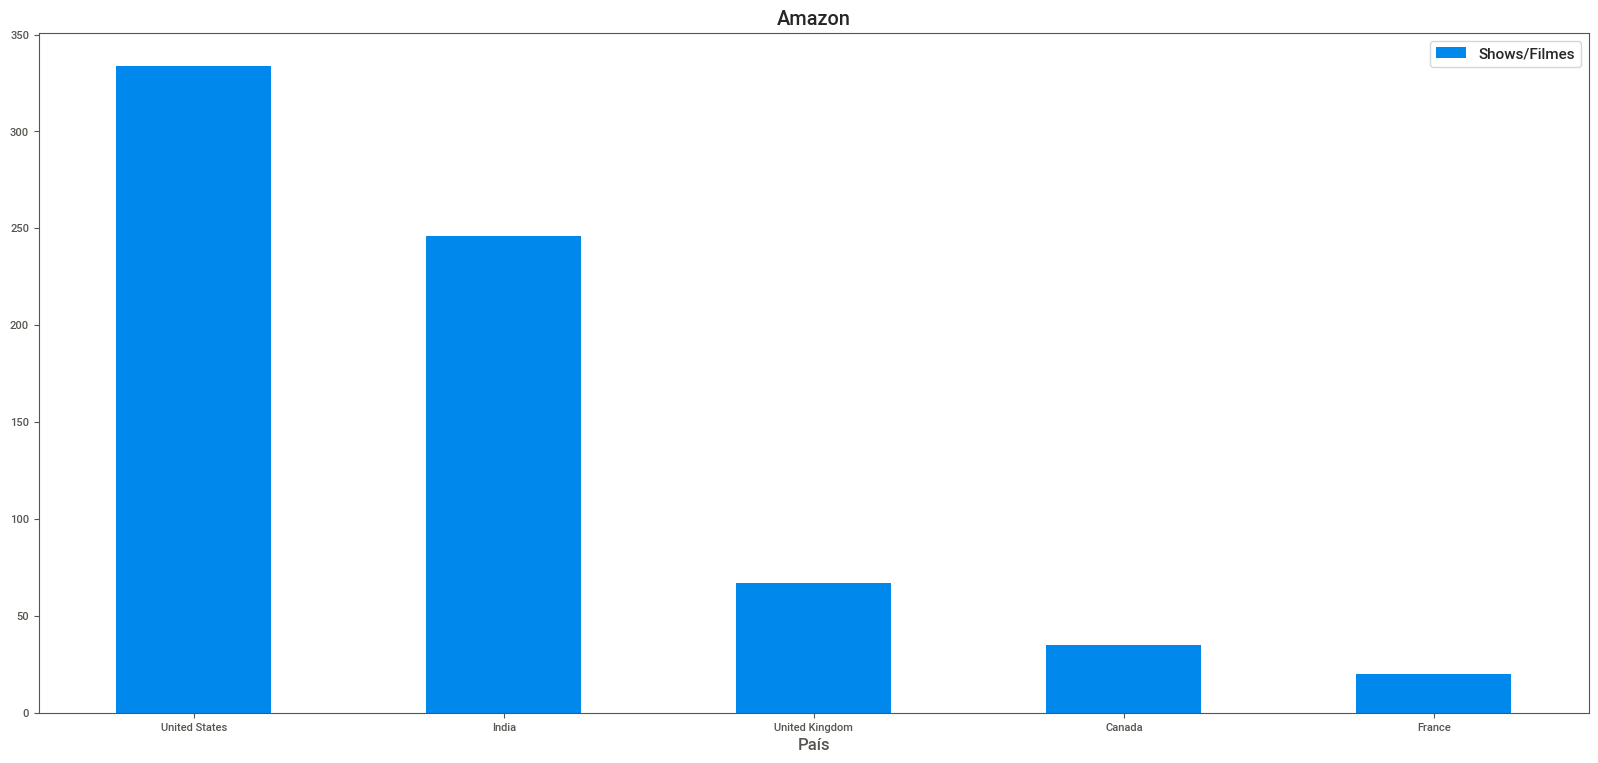

In [ ]:
showPlotAmazon = countPlotAmazon.plot.bar(x='País', y='Shows/Filmes', rot=0, title='Amazon')

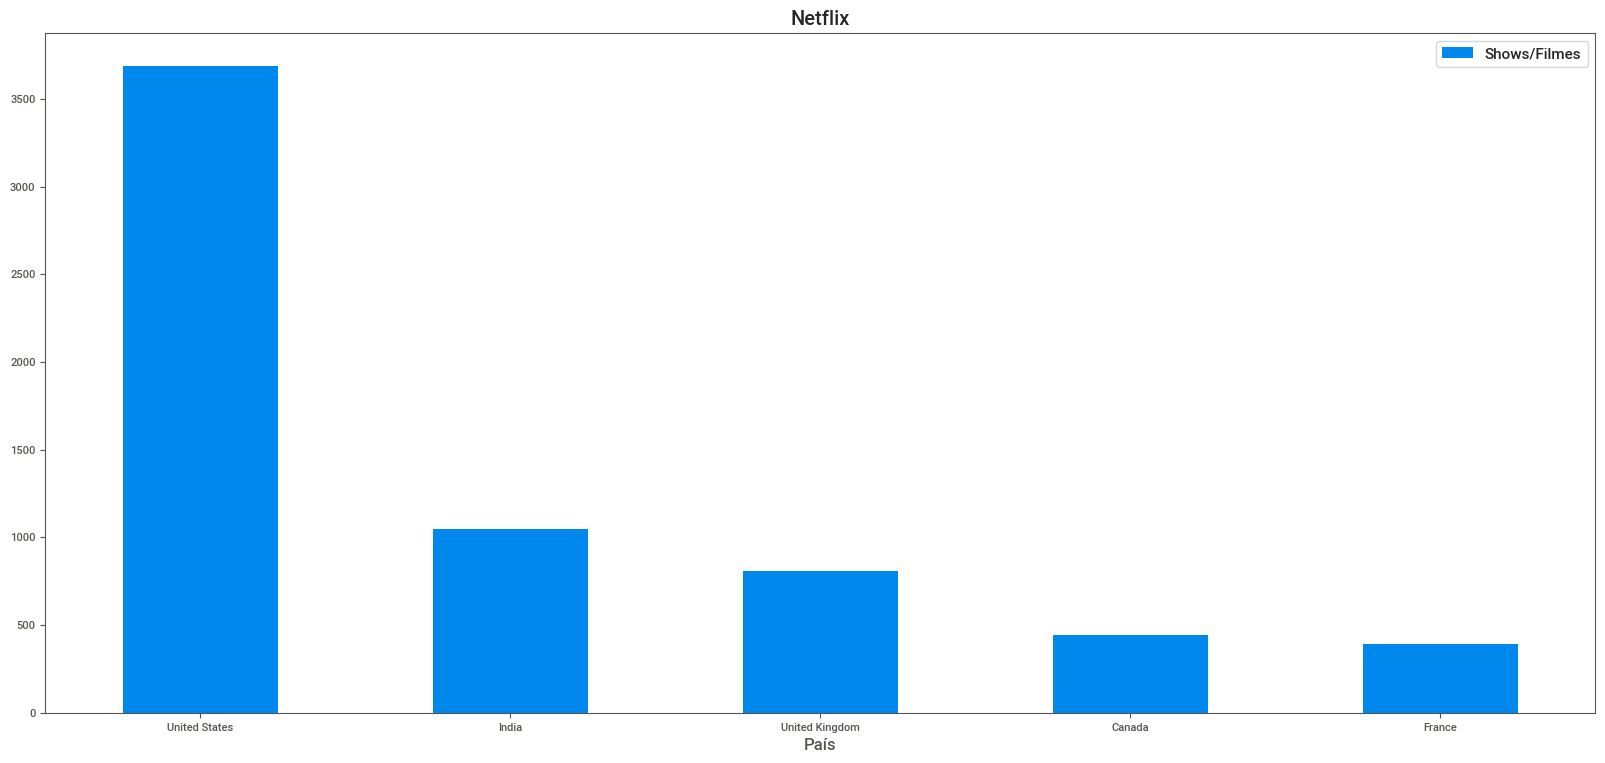

In [ ]:
showPlotNetflix = countPlotNetflix.plot.bar(x='País', y='Shows/Filmes', rot=0,title='Netflix')

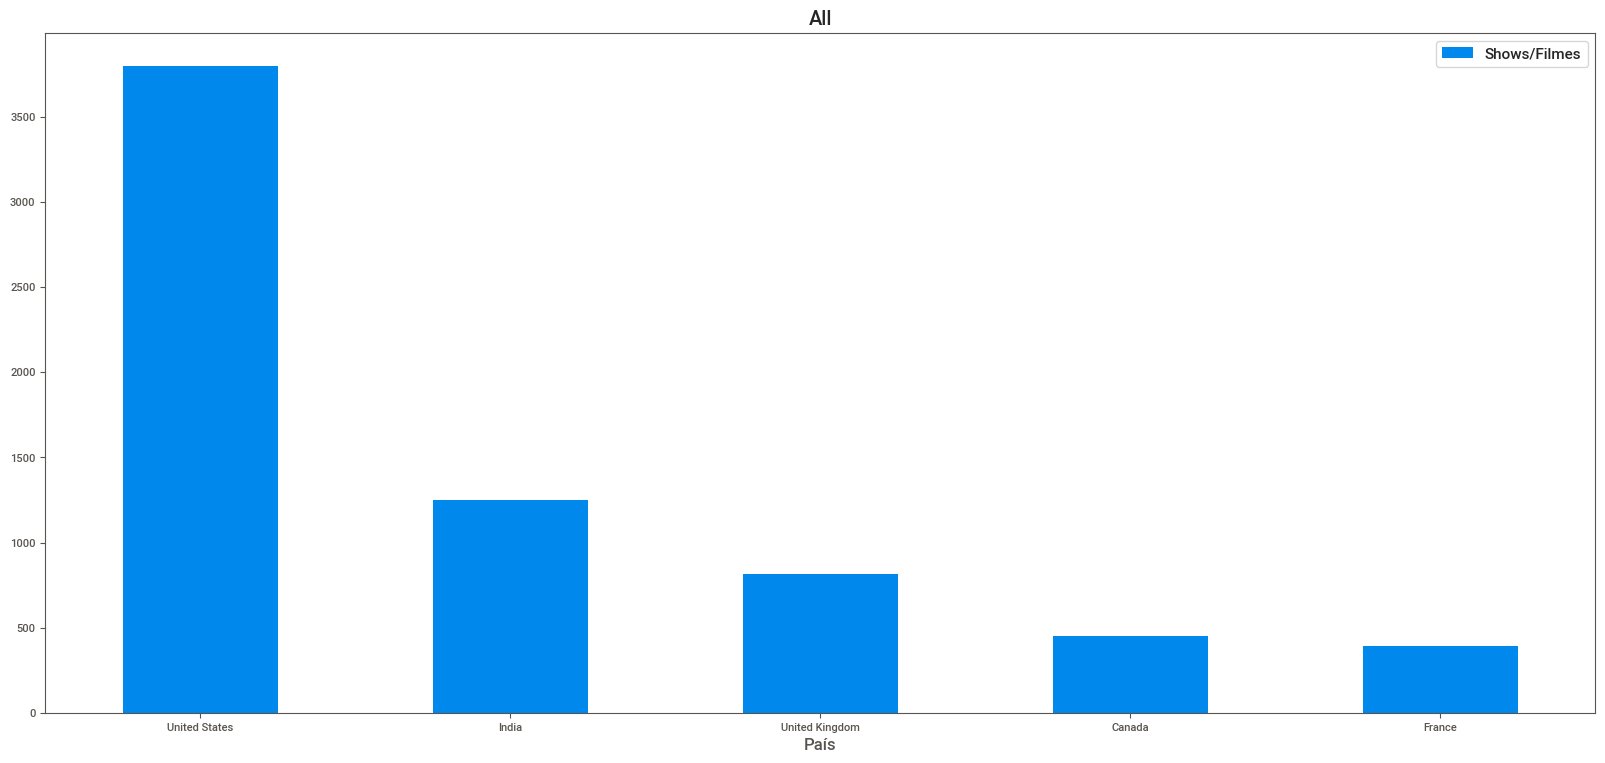

In [ ]:
showCountPlot = countPlot.plot.bar(x='País', y='Shows/Filmes', rot=0, title='All')

In [ ]:
# Amazon tem mais titulos indianos, para outros países a proporção é mais parecida

#3- Mês no qual há mais adições de filmes na plataforma Netflix:

In [ ]:
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
# Apenas uma versão de 'Movie'

In [ ]:
netflixDates = netflix.drop(( netflix[netflix['date_added'].isnull()]).index).reset_index(drop=True)
netflixDates = netflixDates.drop(( netflixDates[netflixDates['type'] == 'TV Show']).index).reset_index(drop=True)
netflixDates

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...
6126,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
6127,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
6128,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
6129,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
def split_it(date):
    return re.findall('(.*[A-Za-z])', date) # Usa regex para achar o mês

In [ ]:
netflixDates['date_added'] = netflixDates['date_added'].str.strip() # Retira os espaços em branco das strings
netflixDates['date_added'] = netflixDates['date_added'].apply(split_it) # Aplica o regex, mas converte os registros em lista
netflixDates['date_added'] = [''.join(map(str, l)) for l in netflixDates['date_added']] # Transforma de volta em string 

In [ ]:
topMonth = netflixDates['date_added'].value_counts()
topMonth.head(1)

July    565
Name: date_added, dtype: int64

In [ ]:
topMonth = pd.DataFrame(data=topMonth)
topMonth['index'] = range(1, len(topMonth) + 1)
topMonth['index'] = topMonth.index
topMonth.columns = ['count', 'date_added']

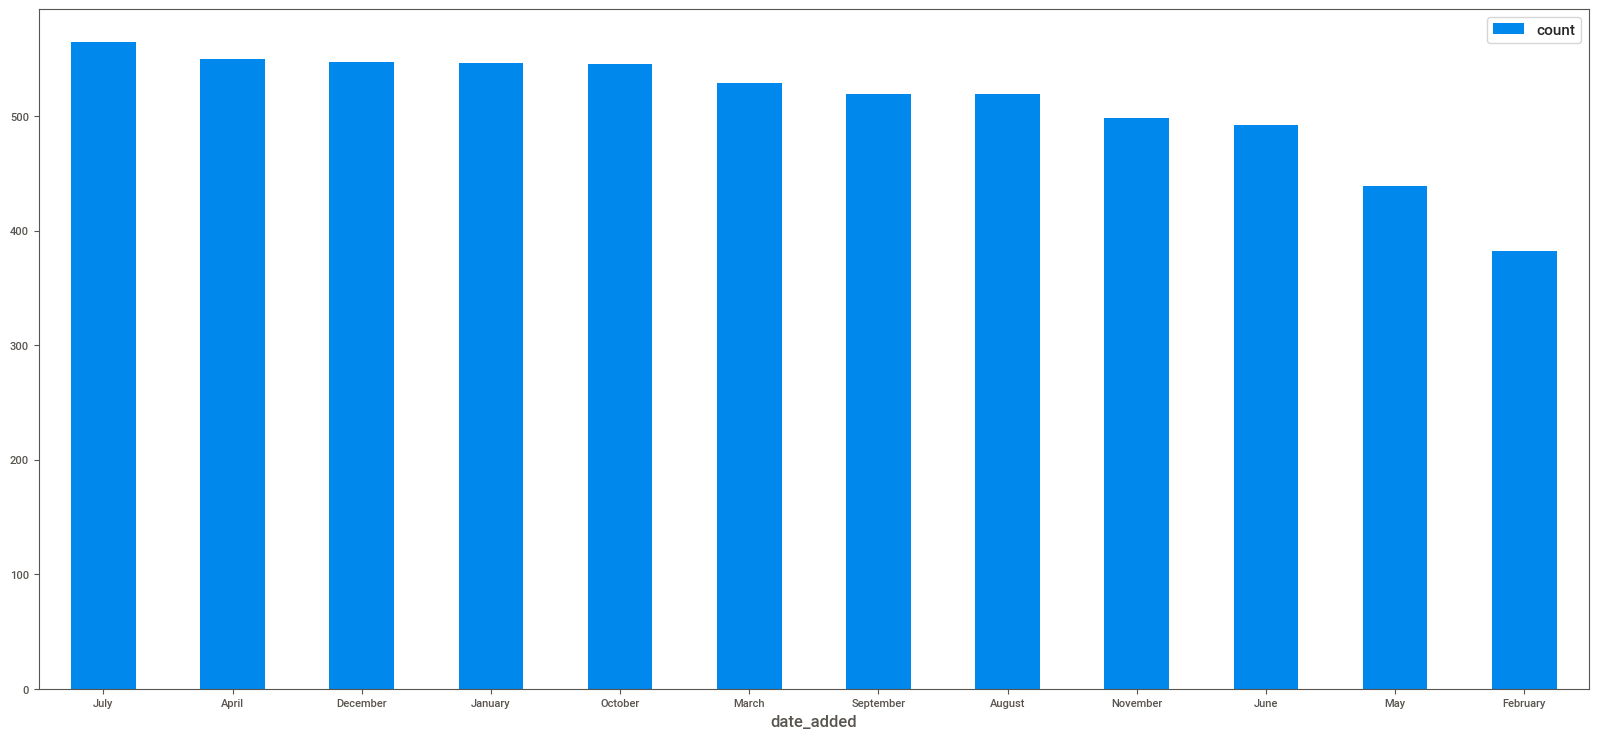

In [ ]:
showTopMonth = topMonth.plot.bar(x='date_added', y='count', rot=0)

In [ ]:
# Queda significativa em fevereiro e maio

#4- Quantidade de filmes listados como comédia:

In [ ]:
concatdf['type'].value_counts()

Movie      13645
TV Show     4399
Name: type, dtype: int64

In [ ]:
concatdf['listed_in']
# Temos pelo menos duas maneiras de se escrever Comédia nos dados, vamos investigar se tem mais alguma. 

0                                         Comedy, Drama
1                                  Drama, International
2                               Action, Drama, Suspense
3                                           Documentary
4                                        Drama, Fantasy
                              ...                      
18039                    Cult Movies, Dramas, Thrillers
18040            Kids' TV, Korean TV Shows, TV Comedies
18041                           Comedies, Horror Movies
18042                Children & Family Movies, Comedies
18043    Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 18044, dtype: object

In [ ]:
concatMovies = concatdf.drop(( concatdf[concatdf['listed_in'].isnull()]).index).reset_index(drop=True)
concatMovies = concatMovies.drop(( concatMovies[concatMovies['type'] == 'TV Show']).index).reset_index(drop=True)
concatMovies

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...
13640,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
13641,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
13642,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
13643,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
genre = concatMovies['listed_in'].str.split(",").reset_index(drop=True)
genre

0                                         [Comedy,  Drama]
1                                  [Drama,  International]
2                              [Action,  Drama,  Suspense]
3                                            [Documentary]
4                                        [Drama,  Fantasy]
                               ...                        
13640          [Dramas,  International Movies,  Thrillers]
13641                   [Cult Movies,  Dramas,  Thrillers]
13642                           [Comedies,  Horror Movies]
13643                [Children & Family Movies,  Comedies]
13644    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 13645, dtype: object

In [ ]:
aux = []
for i in range(0,len(genre)):
  stripped = [s.strip() for s in genre[i]]
  aux += stripped

genreCount = [[x,aux.count(x)] for x in set(aux)]

In [ ]:
genreCount = pd.DataFrame(data=genreCount)
genreCount = genreCount.rename(columns={0: "Genero", 1: "Quantidade"})
genreCount

,Genero,Quantidade
0,International Movies,2672
1,Fantasy,51
2,Suspense,1381
3,Entertainment,444
4,Comedy,1815
5,Sci-Fi & Fantasy,232
6,Anime,29
7,Faith and Spirituality,57
8,and Culture,444
9,Drama,3206


In [ ]:
total = 0
for i in range(0, len(genreCount)):
  if 'Comed' in genreCount['Genero'][i]:
    total += genreCount['Quantidade'][i]
    print(genreCount['Genero'][i])
print(total)
# Achamos as maneiras distintas de se escrever comédia nos dados e somamos suas quantidades

Comedy
Stand-Up Comedy
Comedies
3746


In [ ]:
for i in range(0, len(genreCount)):
  if 'Faith' in genreCount['Genero'][i]:
    genreCount.loc[:, ('Genero')][i] = 'Faith and Spirituality'
    #genreCount['Genero'][i] = 'Faith and Spirituality'
  if 'omed' in genreCount['Genero'][i]:
    genreCount.loc[:, ('Genero')][i] = 'Comedy'
  elif 'usic' in genreCount['Genero'][i]:
    genreCount.loc[:, ('Genero')][i] = 'Music'
  elif 'Anime' in genreCount['Genero'][i]:
    genreCount.loc[:, ('Genero')][i] = 'Anime'
  elif 'ntertainment' in genreCount['Genero'][i]:
    genreCount.loc[:, ('Genero')][i] = 'Entertainment'
  elif 'Docu' in genreCount['Genero'][i]:
    genreCount.loc[:, ('Genero')][i] = 'Documentary'
  elif 'Drama' in genreCount['Genero'][i]:
    genreCount.loc[:, ('Genero')][i] = 'Drama'
  elif 'LGBTQ' in genreCount['Genero'][i]:
    genreCount.loc[:, ('Genero')][i] = 'LGBTQ'
  elif 'ports' in genreCount['Genero'][i]:
    genreCount.loc[:, ('Genero')][i] = 'Sports'
    
genreCount.groupby('Genero')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying

In [ ]:
df = genreCount

In [ ]:
aggregation_functions = {'Quantidade': 'sum'}
genreList = df.groupby(df['Genero']).aggregate(aggregation_functions)

In [ ]:
genreList

,Quantidade
Genero,
Action,1488
Action & Adventure,811
Adventure,230
Animation,278
Anime,100
Arthouse,140
Arts,444
Children & Family Movies,618
Classic Movies,106


#5- Lista de todos os gêneros de filmes.

In [ ]:
genreList

,Quantidade
Genero,
Action,1488
Action & Adventure,811
Adventure,230
Animation,278
Anime,100
Arthouse,140
Arts,444
Children & Family Movies,618
Classic Movies,106


#6- A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas
#7- A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas

In [ ]:
conCount = (concatdf['type']=='Movie').value_counts() #13666 Filmes, 4420 Tv Shows
amazonCount = (amazon['type']=='Movie').value_counts() #7814 Filmes, 1854 Tv Shows
netflixCount = (netflix['type']=='Movie').value_counts() #6131 Filmes, 2676 Tv Shows

#1- Top 10 atores/atrizes considerando todos os dados:

In [ ]:
actorsCount.head(10)

,Ator/Atriz,Aparições
24297,Maggie Binkley,56
14431,Anupam Kher,55
55547,Amitabh Bachchan,43
13296,Nassar,43
5096,Shah Rukh Khan,40
27184,Naseeruddin Shah,39
46924,Paresh Rawal,38
42022,Danny Trejo,38
19188,Akshay Kumar,38
49414,Prakash Raj,34


#2 - Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas:

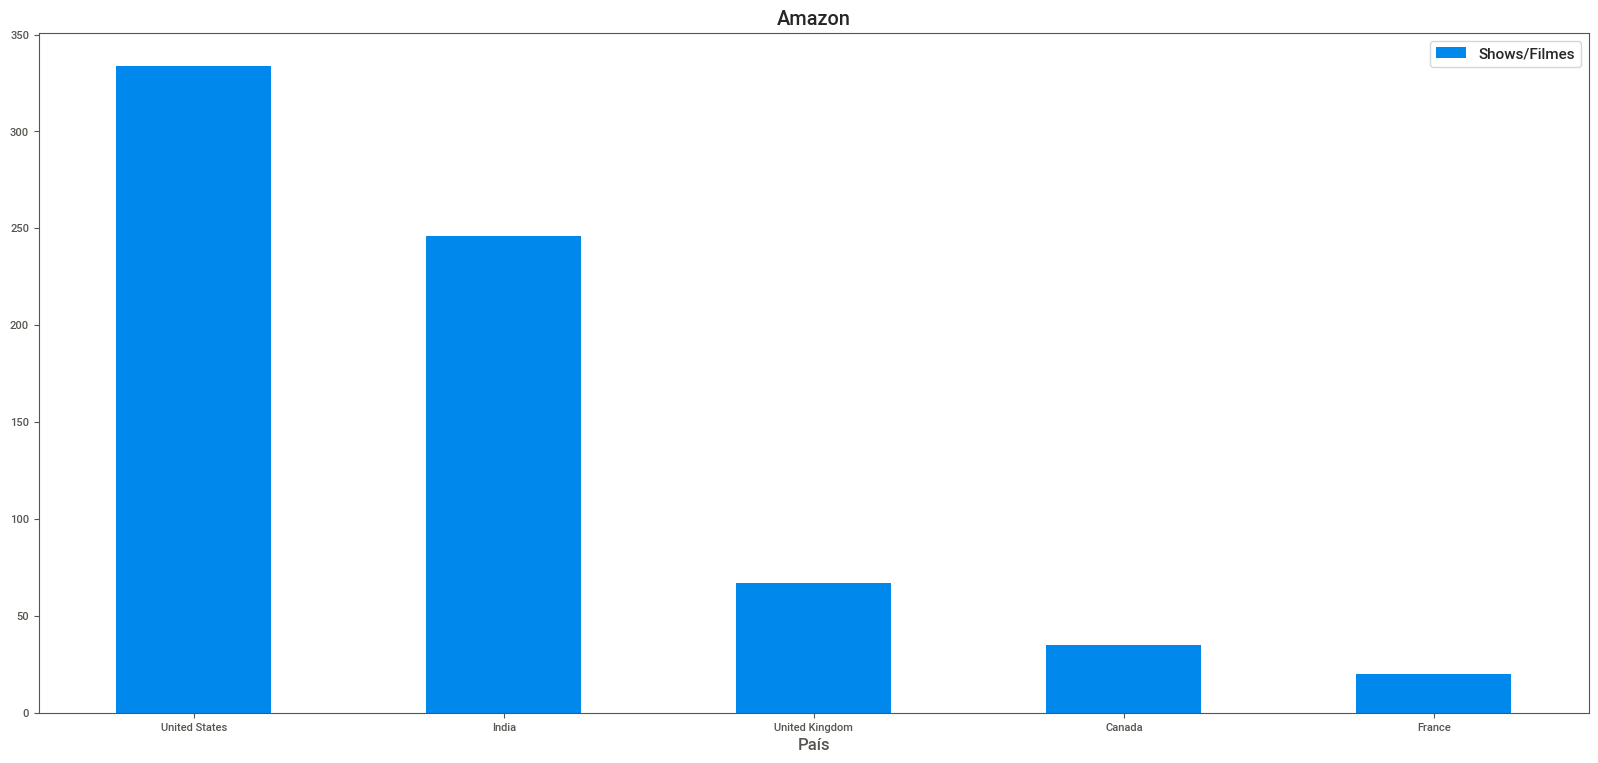

In [ ]:
countPlotAmazon = countPlotAmazon.plot.bar(x='País', y='Shows/Filmes', rot=0, title='Amazon')

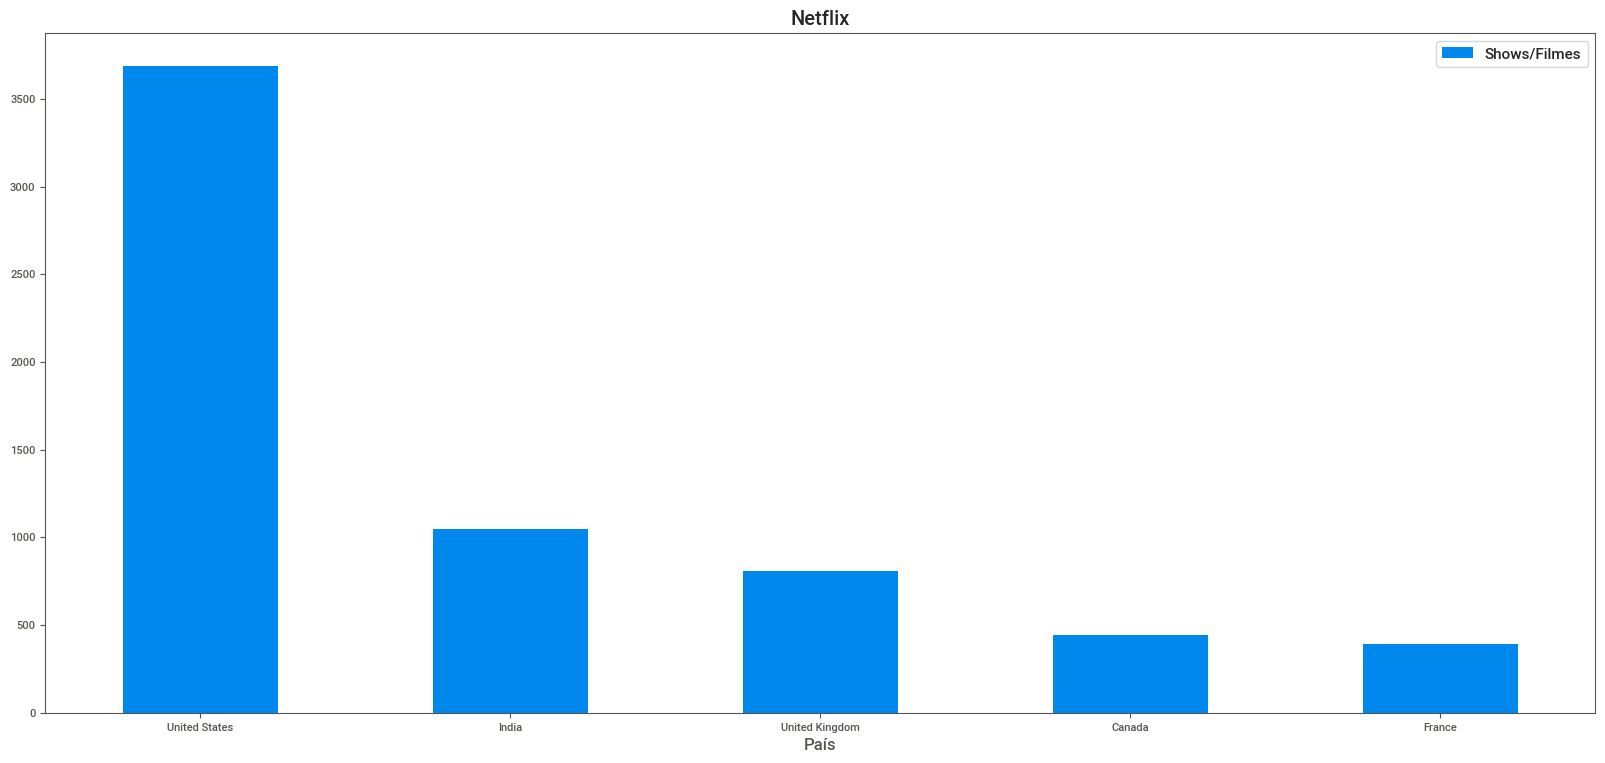

In [ ]:
countPlotNetflix = countPlotNetflix.plot.bar(x='País', y='Shows/Filmes', rot=0, title='Netflix')

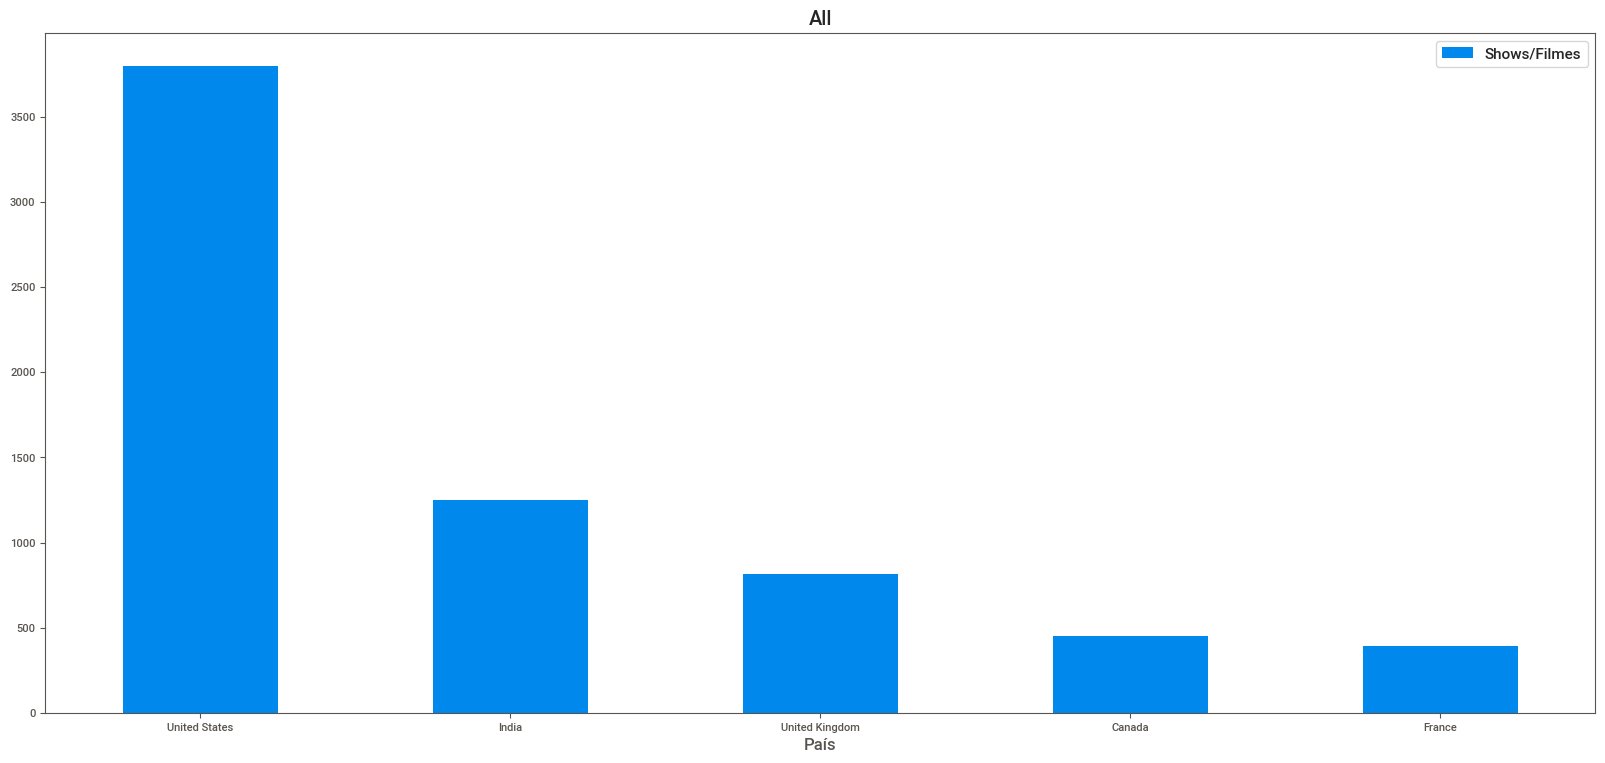

In [ ]:
countPlot = countPlot.plot.bar(x='País', y='Shows/Filmes', rot=0, title='All')

#3- Mês no qual há mais adições de filmes na plataforma Netflix:

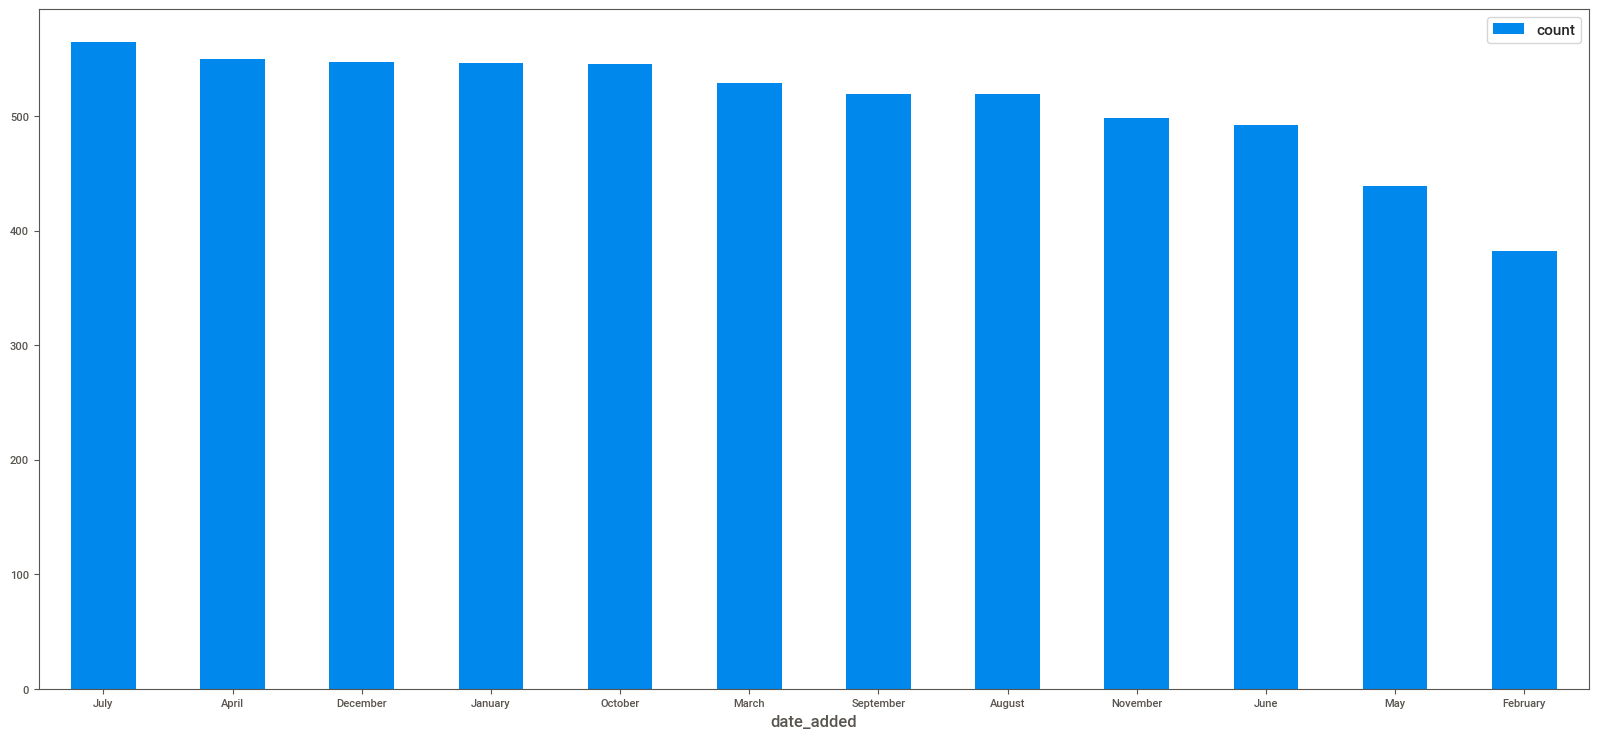

In [ ]:
topMonth = topMonth.plot.bar(x='date_added', y='count', rot=0)

#4- Quantidade de filmes listados como comédia:
3746 

#5- Lista de todos os gêneros de filmes.

In [ ]:
genreList

,Quantidade
Genero,
Action,1488
Action & Adventure,811
Adventure,230
Animation,278
Anime,100
Arthouse,140
Arts,444
Children & Family Movies,618
Classic Movies,106


#6- A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas:
#7- A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas

In [ ]:
labels = ['Movie', 'TV Show']

specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(go.Pie(labels=labels, values=[conCount[1],conCount[0]], name="All Relative Frequencie", title= 'All Relative Frequencie'),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[amazonCount[1],amazonCount[0]], name="Amazon Relative Frequencie", title = 'Amazon Relative Frequencie'),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=[netflixCount[1],netflixCount[0]], name="Netflix", title = 'Netflix Relative Frequencie'),
              2, 1)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



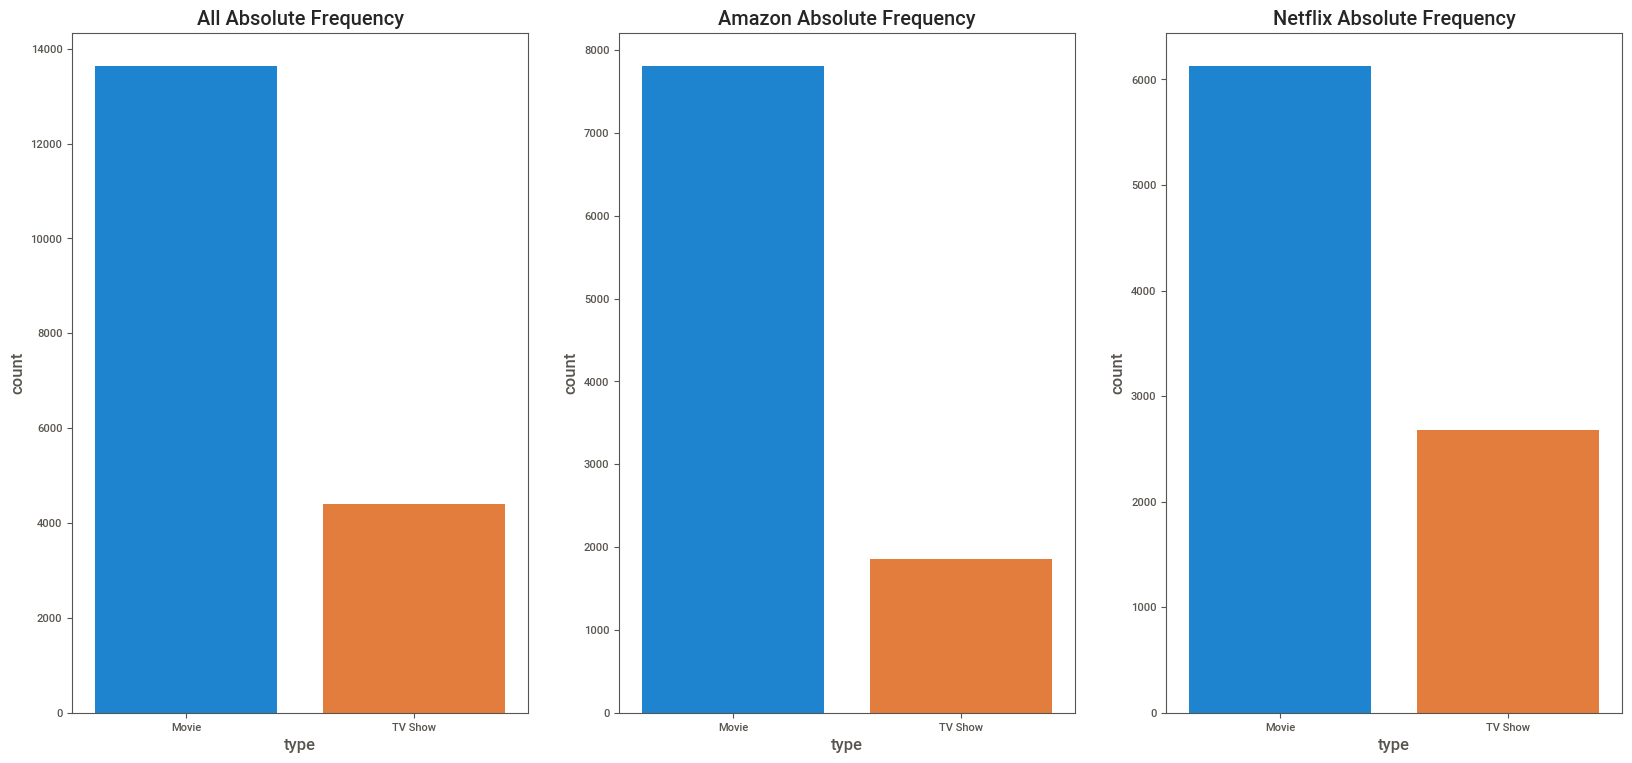

In [ ]:
fig, ax =plt.subplots(1,3)
sns.countplot(concatdf['type'], ax=ax[0]).set_title('All Absolute Frequency')
sns.countplot(amazon['type'], ax=ax[1]).set_title('Amazon Absolute Frequency')
sns.countplot(netflix['type'], ax=ax[2]).set_title('Netflix Absolute Frequency')
fig.show()